#  *Predicting Landslide Vulnarability From Rainfall Dataset*

### Import packages

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model


label_encoder = LabelEncoder()
get_ipython().run_line_magic('matplotlib', 'inline')

### import dataset

In [118]:
import os
for dirname, _, filenames in os.walk('C:/Users/Dilini Dissanayaka/Desktop/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

C:/Users/Dilini Dissanayaka/Desktop/Dataset\gnlandslide (1).xlsx
C:/Users/Dilini Dissanayaka/Desktop/Dataset\gnlandslide.xlsx
C:/Users/Dilini Dissanayaka/Desktop/Dataset\landslde data.xlsx
C:/Users/Dilini Dissanayaka/Desktop/Dataset\landslidemap.jpeg
C:/Users/Dilini Dissanayaka/Desktop/Dataset\rainfall.xlsx


In [119]:
landslide=pd.read_excel('C:/Users/Dilini dissanayaka/Desktop/Dataset\landslde data.xlsx')
rainfall=pd.read_excel(r'C:/Users/Dilini dissanayaka/Desktop/Dataset\rainfall.xlsx')

In [120]:
landslide.head()

,year,month,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,sum,monthly average,annual average
0,NaN,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,NaN,NaN,NaN
1,1999,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.619048,0.000000
2,2000,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.333333,0.083333
3,2001,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.761905,0.000000
4,2002,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.095238,0.083333


In [38]:
landslide.describe()

,sum,monthly average
count,22.000000,11.000000
mean,12.090909,0.532468
std,32.244467,0.923568
min,0.000000,0.000000
25%,0.000000,0.023810
50%,0.500000,0.238095
75%,2.000000,0.595238
max,132.000000,3.190476


In [39]:
rainfall.head()

,id,station_name,longitude,latitude,elevation,code,abbreviation,yyyy,JAN,FEB,...,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average
0,01BD0034,BANDARA ELIYA ESTATE,81.02,6.78,0.0,5.0,PRECIP,1999.0,226.100002,200.899998,...,114.900000,44.500001,76.100000,13.800000,179.400003,230.299997,289.900000,132.100002,166.341667,153.143548
1,01BD0034,BANDARA ELIYA ESTATE,81.02,6.78,0.0,5.0,PRECIP,2000.0,266.199999,391.700002,...,101.399999,80.799999,7.800000,144.000000,135.300000,71.000000,322.800000,155.800000,181.283333,115.646667
2,01BD0034,BANDARA ELIYA ESTATE,81.02,6.78,0.0,5.0,PRECIP,2001.0,191.599996,71.200000,...,57.200000,32.800000,88.999998,6.500000,83.800000,366.700001,167.800000,186.400002,150.483333,189.472131
3,01BD0034,BANDARA ELIYA ESTATE,81.02,6.78,0.0,5.0,PRECIP,2002.0,92.700000,85.700000,...,195.200003,62.600000,4.000000,72.299999,86.300001,612.799997,342.999997,227.600000,217.025000,326.995161
4,01BD0034,BANDARA ELIYA ESTATE,81.02,6.78,0.0,5.0,PRECIP,2003.0,233.699998,59.300001,...,239.000001,20.200000,63.700000,11.000000,218.199999,188.299999,384.400000,53.100000,181.899999,181.393443


In [40]:

rainfall['station_name'].unique()

array(['BANDARA ELIYA ESTATE', 'BANDARAWELA', 'HAPUTALE FACTORY', nan],
      dtype=object)

In [41]:
rainfall.groupby('station_name')['yyyy'].count()

station_name
BANDARA ELIYA ESTATE    21
BANDARAWELA             21
HAPUTALE FACTORY        21
Name: yyyy, dtype: int64

In [42]:
rainfall.describe()

,longitude,latitude,elevation,code,yyyy,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average
count,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,61.000000,62.000000,63.000000,62.000000,60.000000,61.000000,61.000000,62.000000,62.000000,61.000000,58.000000,63.000000,12.000000
mean,80.983333,6.796667,881.000000,5.0,2009.000000,153.143548,115.646667,189.472131,326.995161,181.393443,66.423729,63.400000,67.633333,165.481967,400.172131,368.931667,248.515789,197.902885,195.600797
std,0.028905,0.031160,632.967741,0.0,6.103938,99.826808,95.987566,139.085475,137.058142,127.754955,76.391260,64.534050,57.181756,121.565095,209.909956,164.469994,152.470078,56.501696,117.488401
min,80.950000,6.770000,0.000000,5.0,1999.000000,14.100000,0.000000,13.600000,57.000000,17.700000,0.000000,0.500000,0.000000,0.000000,50.699998,108.400000,41.400000,71.866667,63.400000
25%,80.950000,6.770000,0.000000,5.0,2004.000000,58.500000,51.700000,93.774999,218.500000,95.675001,20.075000,28.000000,26.500000,83.975000,230.524998,243.500000,159.700000,154.708333,103.643333
50%,80.980000,6.780000,1225.000000,5.0,2009.000000,149.300000,83.000000,174.100000,300.800002,150.900000,40.500000,52.000000,60.000000,133.250000,386.836066,334.800003,220.899999,193.045455,173.437705
75%,81.020000,6.840000,1418.000000,5.0,2014.000000,229.600000,175.000001,249.400000,428.199999,236.800002,81.199999,82.000000,88.500000,232.950001,571.525002,462.499999,296.300000,238.075000,268.135632
max,81.020000,6.840000,1418.000000,5.0,2019.000000,405.500000,452.799999,847.000004,634.000000,628.500000,440.000009,308.400001,264.500000,507.000003,898.800001,873.200006,709.000000,361.700000,400.172131


### Landslide data

# Checking missing values

In [43]:
print(landslide.shape)

missing_values_landslide = (landslide.isnull().sum())
print(missing_values_landslide[missing_values_landslide > 0])

(25, 15)
year                2
Unnamed: 2          1
Unnamed: 3          1
Unnamed: 4          1
Unnamed: 5          1
Unnamed: 6          1
Unnamed: 7          1
Unnamed: 8          1
Unnamed: 9          1
Unnamed: 10         1
Unnamed: 11         1
Unnamed: 12         1
sum                 3
monthly average    14
dtype: int64


In [44]:
landslide


# High number of missing values in Report No and Location. So droping both columns.

,year,month,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,sum,monthly average
0,NaN,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,NaN,NaN
1,1999,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.619048
2,2000,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.333333
3,2001,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.761905
4,2002,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.095238
5,2003,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.047619
6,2004,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
7,2005,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.238095
8,2006,0,0,0,0,0,0,0,0,0,11,64,7,82.0,0.000000
9,2007,7,4,7,0,0,0,5,0,0,0,0,2,25.0,0.000000


In [45]:
print(landslide.shape)

missing_values_landslide = (landslide.isnull().sum())
print(missing_values_landslide[missing_values_landslide > 0])


(25, 15)
year                2
Unnamed: 2          1
Unnamed: 3          1
Unnamed: 4          1
Unnamed: 5          1
Unnamed: 6          1
Unnamed: 7          1
Unnamed: 8          1
Unnamed: 9          1
Unnamed: 10         1
Unnamed: 11         1
Unnamed: 12         1
sum                 3
monthly average    14
dtype: int64


In [46]:
landslide


# Droping rows with missing data

,year,month,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,sum,monthly average
0,NaN,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,NaN,NaN
1,1999,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.619048
2,2000,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.333333
3,2001,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.761905
4,2002,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.095238
5,2003,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.047619
6,2004,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
7,2005,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.238095
8,2006,0,0,0,0,0,0,0,0,0,11,64,7,82.0,0.000000
9,2007,7,4,7,0,0,0,5,0,0,0,0,2,25.0,0.000000


In [47]:
landslide.dropna(axis=0, subset=['year'], inplace=True)
landslide.dropna(axis=0, subset=['month'], inplace=True)

In [48]:
print(landslide.shape)

missing_values_landslide = (landslide.isnull().sum())
print(missing_values_landslide[missing_values_landslide > 0])


(23, 15)
sum                 1
monthly average    12
dtype: int64


In [49]:
landslide
# Landslide data is ready.




,year,month,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,sum,monthly average
1,1999,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.619048
2,2000,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.333333
3,2001,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.761905
4,2002,0,0,0,1,0,0,0,0,0,0,0,0,1.0,0.095238
5,2003,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.047619
6,2004,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.000000
7,2005,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.238095
8,2006,0,0,0,0,0,0,0,0,0,11,64,7,82.0,0.000000
9,2007,7,4,7,0,0,0,5,0,0,0,0,2,25.0,0.000000
10,2008,4,3,7,1,0,0,0,0,0,1,0,0,16.0,3.190476


### Rainfall Data

In [50]:
print(rainfall.shape)

missing_values_landslide = (rainfall.isnull().sum())
print(missing_values_landslide[missing_values_landslide > 0])


(64, 22)
id                  1
station_name        1
longitude           1
latitude            1
elevation           1
code                1
abbreviation        1
yyyy                1
JAN                 1
FEB                 3
MAR                 2
APR                 1
MAY                 2
JUN                 4
JUL                 3
AUG                 3
SEP                 2
OCT                 2
NOV                 3
DEC                 6
annual              1
monthly average    52
dtype: int64


In [51]:
rainfall = rainfall.drop('abbreviation', axis=1)
rainfall = rainfall.drop('code', axis=1)
rainfall = rainfall.drop('elevation', axis=1)
rainfall = rainfall.drop('longitude', axis=1)
rainfall = rainfall.drop('latitude', axis=1)


In [52]:
rainfall 

,id,station_name,yyyy,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average
0,01BD0034,BANDARA ELIYA ESTATE,1999.0,226.100002,200.899998,266.199999,221.900002,114.900000,44.500001,76.100000,13.800000,179.400003,230.299997,289.900000,132.100002,166.341667,153.143548
1,01BD0034,BANDARA ELIYA ESTATE,2000.0,266.199999,391.700002,295.800000,202.800001,101.399999,80.799999,7.800000,144.000000,135.300000,71.000000,322.800000,155.800000,181.283333,115.646667
2,01BD0034,BANDARA ELIYA ESTATE,2001.0,191.599996,71.200000,13.600000,539.200005,57.200000,32.800000,88.999998,6.500000,83.800000,366.700001,167.800000,186.400002,150.483333,189.472131
3,01BD0034,BANDARA ELIYA ESTATE,2002.0,92.700000,85.700000,276.700002,545.400003,195.200003,62.600000,4.000000,72.299999,86.300001,612.799997,342.999997,227.600000,217.025000,326.995161
4,01BD0034,BANDARA ELIYA ESTATE,2003.0,233.699998,59.300001,412.599995,299.299999,239.000001,20.200000,63.700000,11.000000,218.199999,188.299999,384.400000,53.100000,181.899999,181.393443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,01BD152A,HAPUTALE FACTORY,2016.0,51.000000,0.000000,89.000000,162.000001,384.500000,3.000000,91.500000,42.499999,18.000000,51.300000,198.200000,55.400001,95.533333,NaN
60,01BD152A,HAPUTALE FACTORY,2017.0,130.300000,54.100000,334.100000,91.000000,189.500000,26.000001,39.000000,70.700001,163.500000,279.500003,510.600000,NaN,171.663637,NaN
61,01BD152A,HAPUTALE FACTORY,2018.0,158.200000,37.400000,240.100001,287.099998,628.500000,6.300000,39.900001,73.900000,298.400000,653.999999,384.700001,203.999994,251.041666,NaN
62,01BD152A,HAPUTALE FACTORY,2019.0,113.599999,191.800000,66.000000,301.699998,34.600000,NaN,82.800000,NaN,462.400000,NaN,NaN,NaN,178.985714,NaN


In [53]:
rainfall.dropna(axis=0, subset=['yyyy'], inplace=True)
rainfall.dropna(axis=0, subset=['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC'], inplace=True)
rainfall.dropna(axis=0, subset=['annual'], inplace=True)
#rainfall.dropna(axis=0, subset=['monthly average'], inplace=True)

In [54]:
rainfall.head()

,id,station_name,yyyy,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average
0,01BD0034,BANDARA ELIYA ESTATE,1999.0,226.100002,200.899998,266.199999,221.900002,114.900000,44.500001,76.100000,13.800000,179.400003,230.299997,289.900000,132.100002,166.341667,153.143548
1,01BD0034,BANDARA ELIYA ESTATE,2000.0,266.199999,391.700002,295.800000,202.800001,101.399999,80.799999,7.800000,144.000000,135.300000,71.000000,322.800000,155.800000,181.283333,115.646667
2,01BD0034,BANDARA ELIYA ESTATE,2001.0,191.599996,71.200000,13.600000,539.200005,57.200000,32.800000,88.999998,6.500000,83.800000,366.700001,167.800000,186.400002,150.483333,189.472131
3,01BD0034,BANDARA ELIYA ESTATE,2002.0,92.700000,85.700000,276.700002,545.400003,195.200003,62.600000,4.000000,72.299999,86.300001,612.799997,342.999997,227.600000,217.025000,326.995161
4,01BD0034,BANDARA ELIYA ESTATE,2003.0,233.699998,59.300001,412.599995,299.299999,239.000001,20.200000,63.700000,11.000000,218.199999,188.299999,384.400000,53.100000,181.899999,181.393443


In [55]:
rainfall['station_name'].unique()


# Converting categorical data into numerical data

array(['BANDARA ELIYA ESTATE', 'BANDARAWELA', 'HAPUTALE FACTORY'],
      dtype=object)

In [56]:
rainfall['station_name']

0     BANDARA ELIYA ESTATE
1     BANDARA ELIYA ESTATE
2     BANDARA ELIYA ESTATE
3     BANDARA ELIYA ESTATE
4     BANDARA ELIYA ESTATE
5     BANDARA ELIYA ESTATE
6     BANDARA ELIYA ESTATE
7     BANDARA ELIYA ESTATE
8     BANDARA ELIYA ESTATE
9     BANDARA ELIYA ESTATE
10    BANDARA ELIYA ESTATE
13    BANDARA ELIYA ESTATE
17    BANDARA ELIYA ESTATE
18    BANDARA ELIYA ESTATE
21             BANDARAWELA
22             BANDARAWELA
23             BANDARAWELA
24             BANDARAWELA
25             BANDARAWELA
26             BANDARAWELA
27             BANDARAWELA
28             BANDARAWELA
29             BANDARAWELA
30             BANDARAWELA
31             BANDARAWELA
32             BANDARAWELA
33             BANDARAWELA
34             BANDARAWELA
35             BANDARAWELA
36             BANDARAWELA
37             BANDARAWELA
38             BANDARAWELA
39             BANDARAWELA
40             BANDARAWELA
42        HAPUTALE FACTORY
43        HAPUTALE FACTORY
44        HAPUTALE FACTORY
4

In [57]:
#rainfall['station_name'] = rainfall['station_name'].astype(str)


In [58]:
#rainfall['station_name'] = label_encoder.fit_transform(rainfall['station_name'])


In [59]:
rainfall

,id,station_name,yyyy,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average
0,01BD0034,BANDARA ELIYA ESTATE,1999.0,226.100002,200.899998,266.199999,221.900002,114.900000,44.500001,76.100000,13.800000,179.400003,230.299997,289.900000,132.100002,166.341667,153.143548
1,01BD0034,BANDARA ELIYA ESTATE,2000.0,266.199999,391.700002,295.800000,202.800001,101.399999,80.799999,7.800000,144.000000,135.300000,71.000000,322.800000,155.800000,181.283333,115.646667
2,01BD0034,BANDARA ELIYA ESTATE,2001.0,191.599996,71.200000,13.600000,539.200005,57.200000,32.800000,88.999998,6.500000,83.800000,366.700001,167.800000,186.400002,150.483333,189.472131
3,01BD0034,BANDARA ELIYA ESTATE,2002.0,92.700000,85.700000,276.700002,545.400003,195.200003,62.600000,4.000000,72.299999,86.300001,612.799997,342.999997,227.600000,217.025000,326.995161
4,01BD0034,BANDARA ELIYA ESTATE,2003.0,233.699998,59.300001,412.599995,299.299999,239.000001,20.200000,63.700000,11.000000,218.199999,188.299999,384.400000,53.100000,181.899999,181.393443
5,01BD0034,BANDARA ELIYA ESTATE,2004.0,110.499998,68.699999,87.300001,300.099999,96.500002,17.300000,26.000000,12.600000,330.900002,468.699995,313.000002,313.199999,178.733333,66.423729
6,01BD0034,BANDARA ELIYA ESTATE,2005.0,182.400000,90.600000,216.200001,440.000001,164.000000,24.500000,30.800000,66.400000,95.900002,231.200000,672.199998,135.500000,195.808333,63.400000
7,01BD0034,BANDARA ELIYA ESTATE,2006.0,216.599999,79.300000,181.599998,213.399998,160.999998,23.800000,13.500000,61.999999,154.599998,604.099995,716.399997,325.600002,229.324999,67.633333
8,01BD0034,BANDARA ELIYA ESTATE,2007.0,149.300000,27.700000,130.000000,488.499999,17.700000,54.900000,33.200000,52.700000,127.000000,306.600004,178.900000,257.500000,152.000000,165.481967
9,01BD0034,BANDARA ELIYA ESTATE,2008.0,112.899999,229.099999,416.700002,491.500000,18.000000,10.000000,60.500000,236.400000,40.299999,517.000000,328.200000,208.500000,222.425000,400.172131


In [60]:
#rainfall['station_name']



## rainfall data is ready.

# visualization 



### visualizing rainfall

In [61]:

subdivision = rainfall['station_name'].unique()
subdivision

array(['BANDARA ELIYA ESTATE', 'BANDARAWELA', 'HAPUTALE FACTORY'],
      dtype=object)

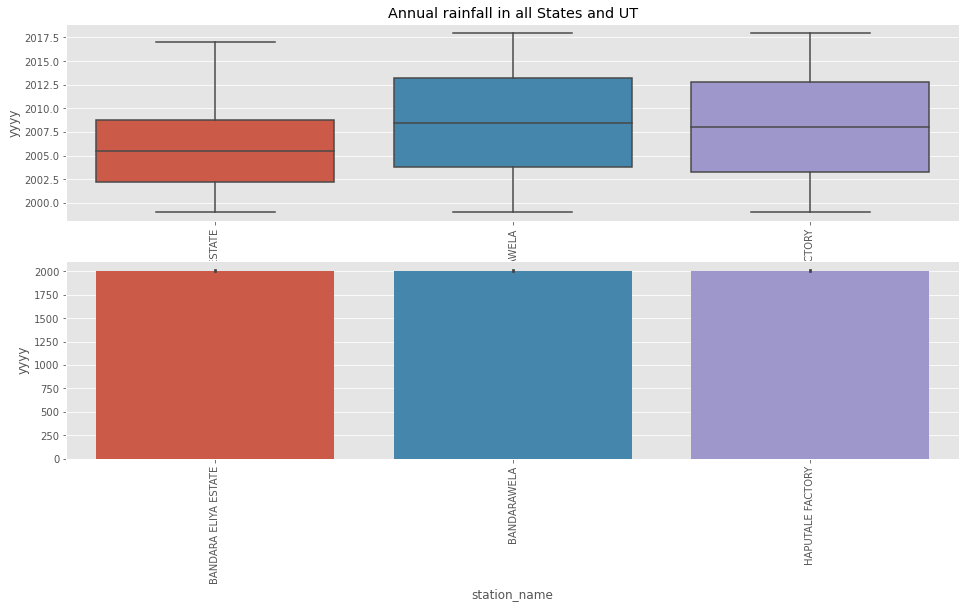

In [62]:

plt.style.use('ggplot')

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='station_name', y='yyyy', data=rainfall)
ax = plt.title('Annual rainfall in all States and UT')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='station_name', y='yyyy', data=rainfall)

In [63]:

# monthly rainfall


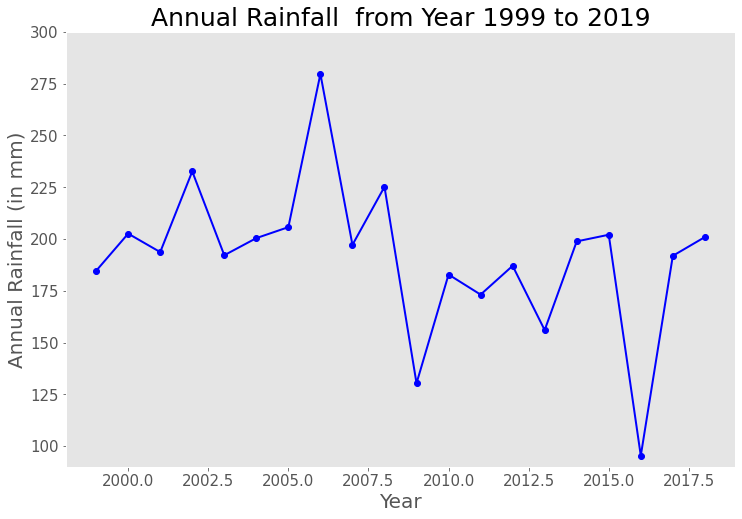

In [64]:

ax=rainfall.groupby("yyyy").mean()['annual'].plot(ylim=(90,300),color='b',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
rainfall['MA10'] = rainfall.groupby('yyyy').mean()['annual'].rolling(100).mean()
rainfall.MA10.plot(color='r',linewidth=4)

plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall  from Year 1999 to 2019',fontsize=25)
ax.tick_params(labelsize=15)
plt.grid()
plt.ioff()


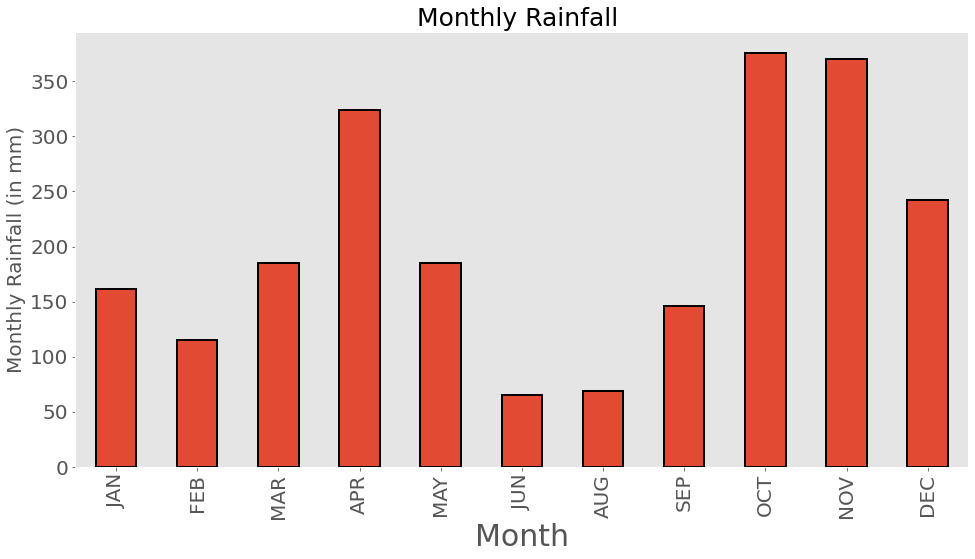

In [65]:
ax=rainfall[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(16,8))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall ',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()


## heat map of rainfall

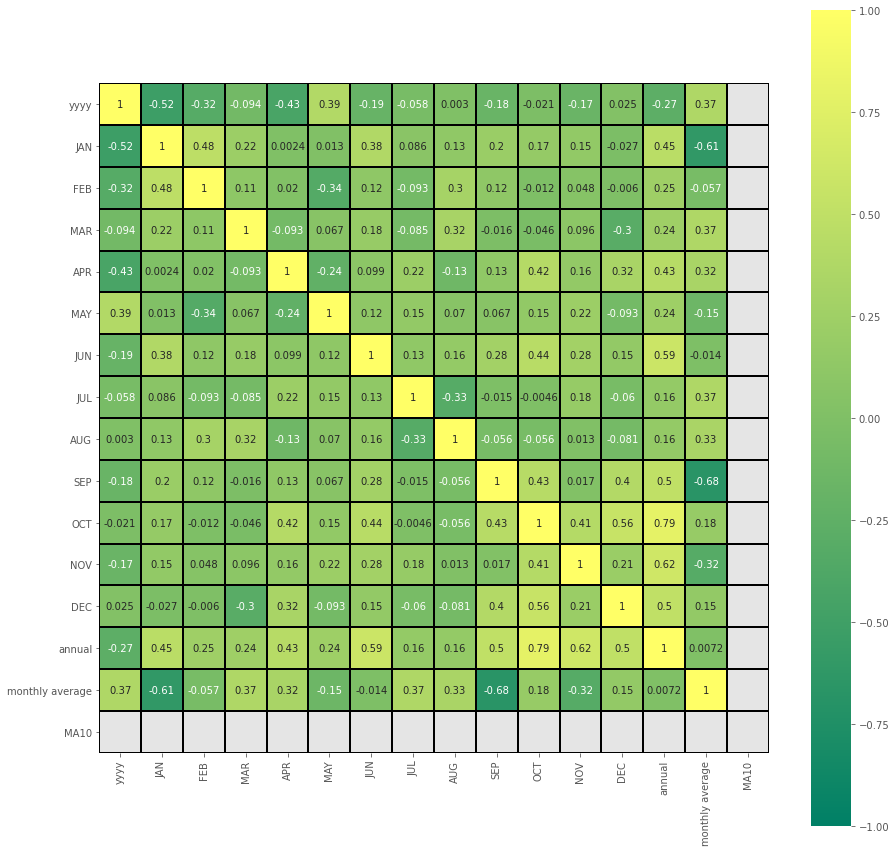

In [66]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(rainfall.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

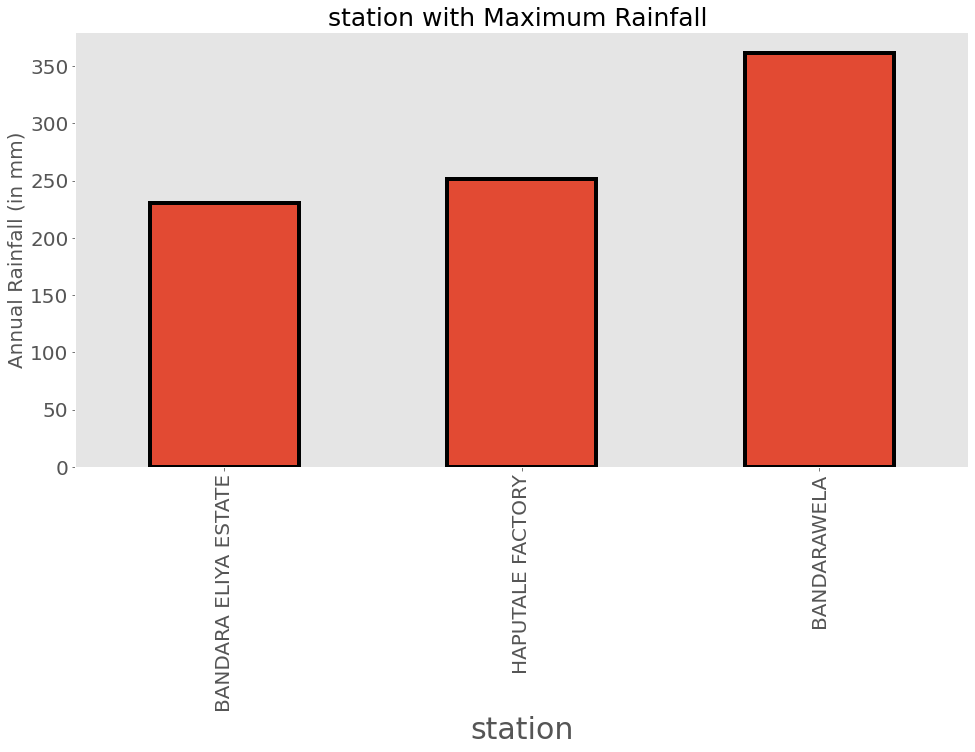

In [67]:
ax=rainfall.groupby(['station_name'])['annual'].max().sort_values().tail(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
#ax=rainfall.plot.bar(x='station_name',y='annual',width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
plt.xlabel('station',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('station with Maximum Rainfall ',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()



# visualizing landslide

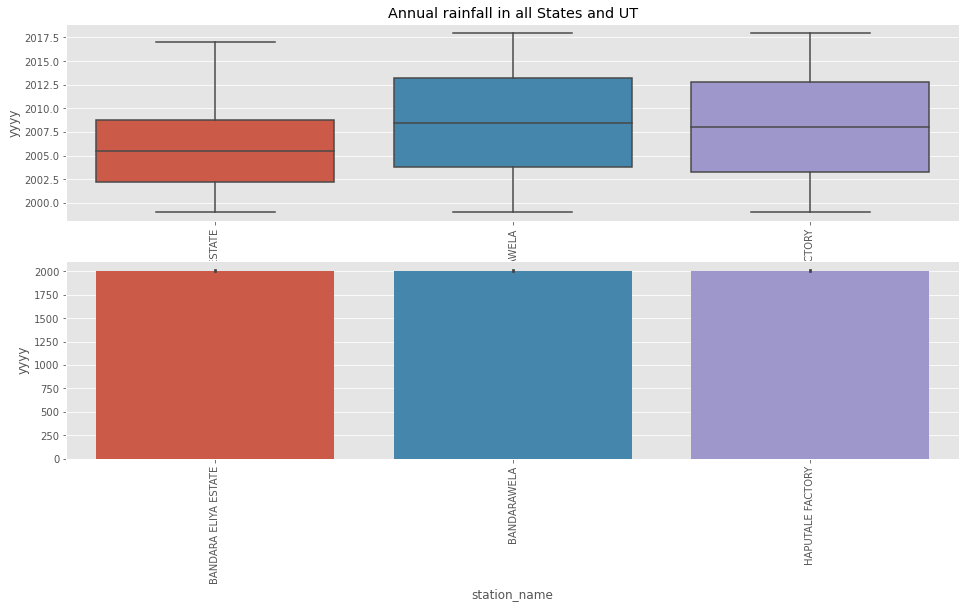

In [68]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='station_name', y='yyyy', data=rainfall)
ax = plt.title('Annual rainfall in all States and UT')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='station_name', y='yyyy', data=rainfall)


In [69]:
print('Average annual rainfall received ]=',int(rainfall['annual'].mean()),'mm')



Average annual rainfall received ]= 191 mm


# comparison

### highest rainfall

In [70]:
rainfall.groupby("yyyy").mean()['annual'].sort_values(ascending=False).head(10)

yyyy
2006.0    279.702777
2002.0    232.638889
2008.0    225.195834
2005.0    205.724495
2000.0    202.591666
2015.0    202.058333
2018.0    200.937500
2004.0    200.427778
2014.0    198.841666
2007.0    197.177778
Name: annual, dtype: float64

## highest landslide

In [122]:
landslide.groupby("year").mean()['annual average'].sort_values(ascending=False).head(10)

year
2006    6.833333
2007    2.083333
2008    1.333333
2011    0.250000
2017    0.166667
2014    0.166667
2002    0.083333
2015    0.083333
2000    0.083333
2012    0.083333
Name: annual average, dtype: float64

## lowest rainfall

In [71]:
rainfall.groupby("yyyy").mean()['annual'].sort_values(ascending=False).tail(10)


yyyy
2001.0    193.683334
2003.0    192.161111
2017.0    191.879167
2012.0    187.050000
1999.0    184.633333
2010.0    182.845833
2011.0    173.150000
2013.0    156.012500
2009.0    130.319445
2016.0     95.355556
Name: annual, dtype: float64

## lowest landslide

In [124]:
landslide.groupby("year").mean()['annual average'].sort_values(ascending=False).tail(10)

year
2016        0.0
2009        0.0
2010        0.0
2005        0.0
2004        0.0
2003        0.0
2001        0.0
2019        0.0
AVEARAGE    NaN
sum         NaN
Name: annual average, dtype: float64

In [72]:

rainfall.groupby(['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']).mean()['monthly average'].sort_values(ascending=False).head(10) 

JAN         FEB         MAR         APR         MAY         JUN        AUG         SEP         OCT         NOV         DEC       
112.899999  229.099999  416.700002  491.500000  18.000000   10.000000  236.400000  40.299999   517.000000  328.200000  208.500000    400.172131
87.000000   4.000000    182.200000  213.000000  137.500000  37.000000  0.000000    0.000000    198.000000  405.000000  351.000000    368.931667
92.700000   85.700000   276.700002  545.400003  195.200003  62.600000  72.299999   86.300001   612.799997  342.999997  227.600000    326.995161
191.599996  71.200000   13.600000   539.200005  57.200000   32.800000  6.500000    83.800000   366.700001  167.800000  186.400002    189.472131
233.699998  59.300001   412.599995  299.299999  239.000001  20.200000  11.000000   218.199999  188.299999  384.400000  53.100000     181.393443
149.300000  27.700000   130.000000  488.499999  17.700000   54.900000  52.700000   127.000000  306.600004  178.900000  257.500000    165.481967
226.10

In [73]:
rainfall.groupby(['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']).mean()['monthly average'].sort_values(ascending=False).tail(10)

JAN         FEB         MAR         APR         MAY         JUN         AUG         SEP         OCT         NOV         DEC       
252.300005  151.600001  91.699999   193.400000  141.699998  79.500002   68.100000   31.100000   214.000000  150.499999  126.399998   NaN
271.999997  288.300001  172.800000  375.000000  126.000000  17.500000   23.300000   33.700000   416.500001  396.500000  204.000000   NaN
286.000000  74.500000   16.000000   493.000000  155.500000  34.000000   2.000000    126.500000  283.500000  243.500000  291.500000   NaN
286.800004  62.200000   194.199994  467.999998  277.600001  216.800001  95.600001   323.800001  694.999994  228.200002  376.199999   NaN
291.299998  137.700001  171.300002  173.700001  111.500001  1.300000    36.200000   120.800000  291.900001  263.600003  159.299999   NaN
303.200000  70.800000   327.200000  298.999996  354.000002  196.000003  9.200000    73.799999   405.200002  620.000000  65.199999    NaN
313.799995  281.399999  163.999999  297.200005 

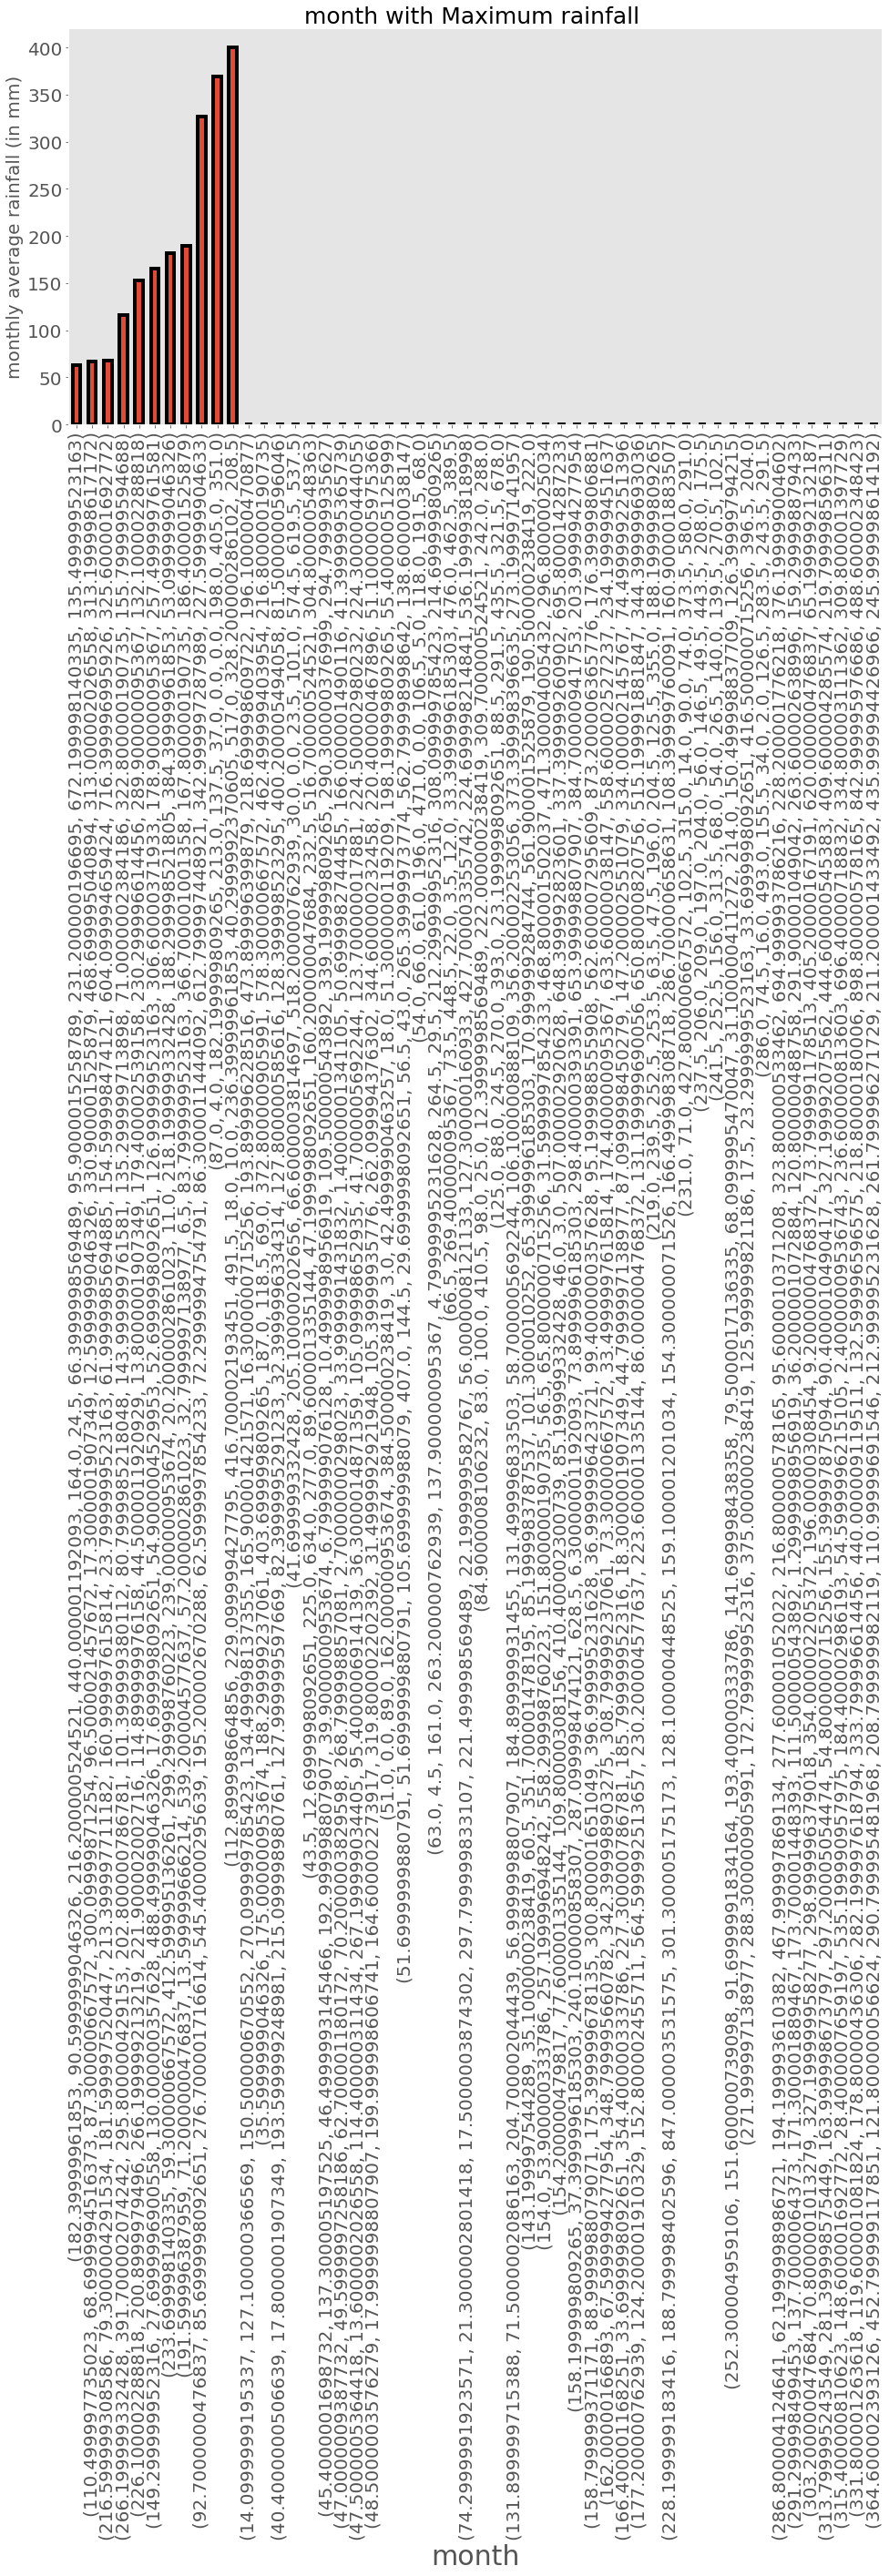

In [74]:
ax=rainfall.groupby(['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC'])['monthly average'].max().sort_values().tail(100).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))

plt.xlabel('month',fontsize=30)
plt.ylabel('monthly average rainfall (in mm)',fontsize=20)
plt.title('month with Maximum rainfall ',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()


# visualizing landslide data
# 


In [75]:

subdivision = landslide['month'].unique()
subdivision

array([0, 1, 7, 4, 12, 0.6190476190476191], dtype=object)

In [76]:
subdivision = landslide['year'].unique()
subdivision

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 'sum',
       'AVEARAGE'], dtype=object)

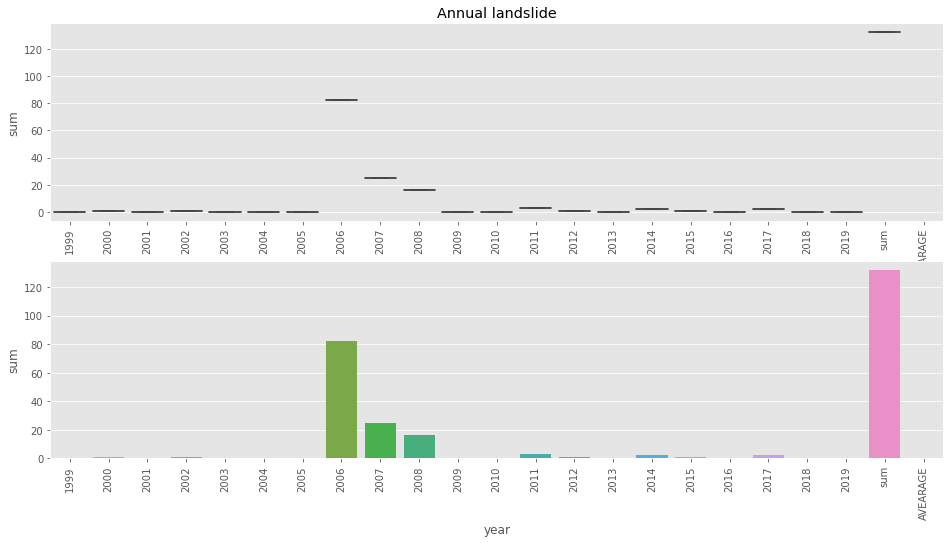

In [77]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(16, 8))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='year', y='sum', data=landslide)
ax = plt.title('Annual landslide')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='year', y='sum', data=landslide)



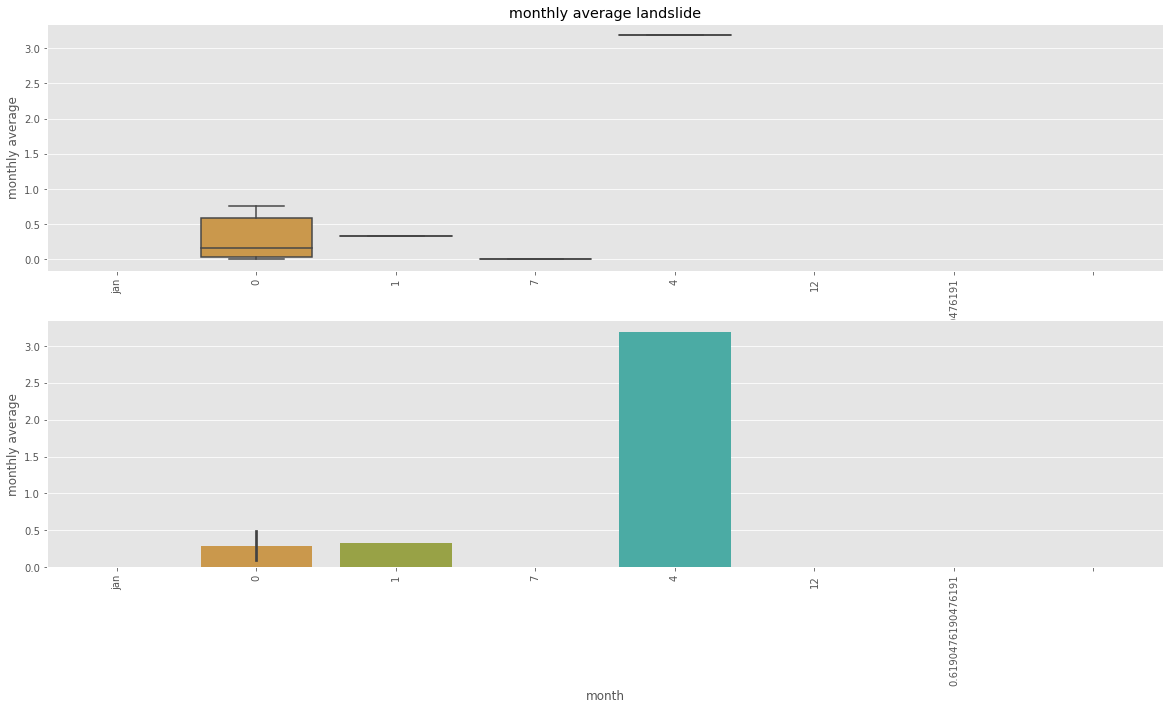

In [121]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='month', y='monthly average', data=landslide)
ax = plt.title('monthly average landslide')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='month', y='monthly average', data=landslide)



## heat map for landslide data

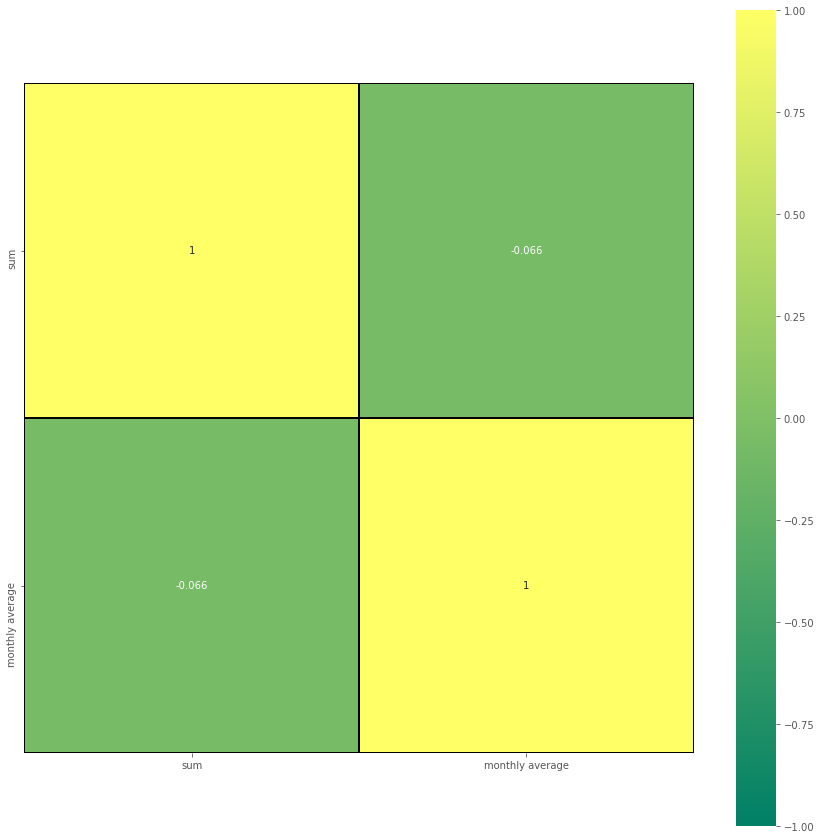

In [79]:
fig=plt.gcf()
fig.set_size_inches(15,15)
fig=sns.heatmap(landslide.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


## data graphically

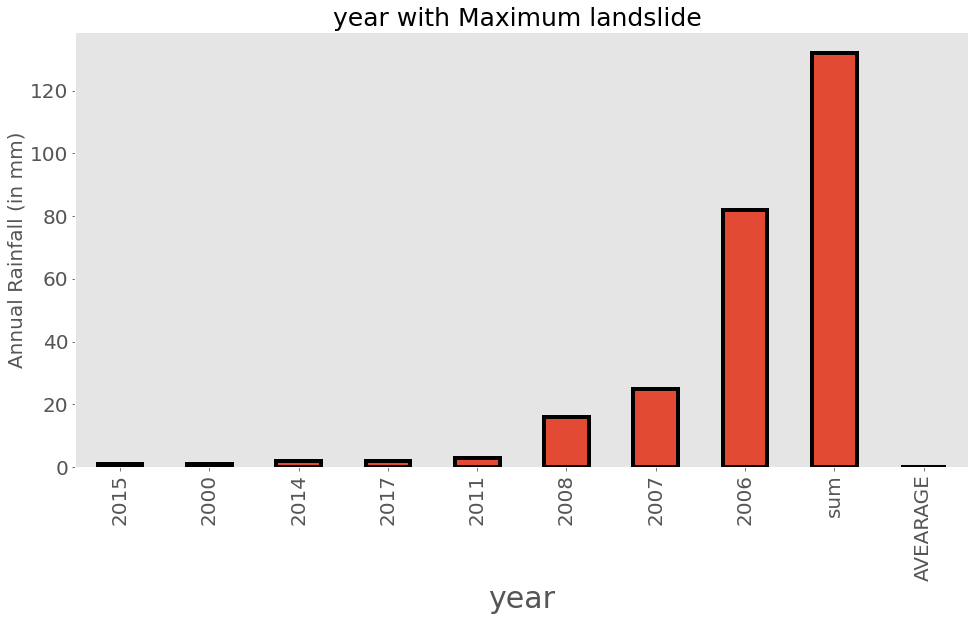

In [80]:
ax=landslide.groupby(['year'])['sum'].max().sort_values().tail(10).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))

plt.xlabel('year',fontsize=30)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('year with Maximum landslide ',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [81]:
# #ax=landslide.groupby(['jan', 'feb', 'mar', 'apr','may', 'jun', 'aug', 'sep', 'oct','nov','dec'])['monthly average'].max().sort_values().tail(100).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=4,figsize=(16,8))
# 
# plt.xlabel('month',fontsize=30)
# plt.ylabel('monthly average landslide (in mm)',fontsize=20)
# plt.title('month with Maximum landslide ',fontsize=25)
# ax.tick_params(labelsize=20)
# plt.grid()
# plt.ioff()
# 

# landslide.groupby(['jan', 'feb', 'mar', 'apr','may', 'jun', 'aug', 'sep', 'oct','nov','dec']).mean()['monthly average'].sort_values(ascending=False).head(10)

# Extracting  landslide data for selected GN division
# 

# landslide data for selected region
### LOAD IMAGE


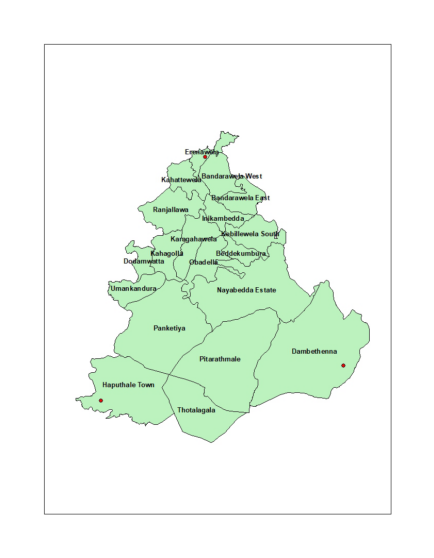

In [82]:
#extracted data

img=np.array(Image.open('C:/Users/Dilini Dissanayaka/Desktop/Dataset\landslidemap.jpeg'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.ioff()
plt.show()


In [83]:
landslide=pd.read_excel('C:/Users/Dilini dissanayaka/Desktop/dataset\gnlandslide.xlsx')

In [84]:
landslide.head()

,A,Province,District,DSD,GND,Date of Occurrence,year,month
0,7,Uva,Badulla,Bandarawela,NaN,2014-10-30,2014,Oct
1,25,Uva,Badulla,Bandarawela,Gediyaroda(GN),2008-01-09,2008,Jan
2,26,Uva,Badulla,Bandarawela,"Wiyala Wagura,Heel Oya,Bandarawela",2006-10-27,2006,Oct
3,27,Uva,Badulla,Bandarawela,NaN,2006-10-20,2006,Oct
4,28,Uva,Badulla,Bandarawela,Diganathenna(GN),2006-11-09,2006,Nov


In [85]:

landslide['DSD'].unique()

array(['Bandarawela', 'Haputale', 'Passara'], dtype=object)

In [86]:
landslide['GND'].unique()

array([nan, 'Gediyaroda(GN)', 'Wiyala Wagura,Heel Oya,Bandarawela',
       'Diganathenna(GN)', 'Wewathenna(GN)', 'Mathetilla(GN)',
       'Makul Ella(GN)', 'Daharmapala Mawata,Bandarawela',
       'Athagala rd,Galwala,Bandarawela', 'Jalasha RD,Bandarawela',
       'Kolathenna,Bandarawela', 'Amunudowa,Godewatta,Annalapitiya',
       'Bambaragama(GN)', 'Ambegoda(GN)', 'Bandarawela',
       'Kebillawela North(GN)', 'Ambegoda (GN)', 'Maketilla(GN)',
       'Bandarawela (GN)', 'Jalasha Kanda,Bandarawela',
       'Icelab Watta(GN)', 'Thalamadugasthenna,Bandarawela',
       'Dambagolla,Kande Arawa', 'Liyangahawela(GN)', 'kabillawela(GN)',
       'Vishaka mw,Bandarawela', 'Hamparawa ', 'Uda Arawa(GN)',
       'withanawewa(GN)', 'Gode Watta,Amunudowa', 'Maha Ulpatha(GN)',
       'Makulella(GN)', 'Ammunudowa,Bandarawela', 'Uda Arawa,Mirahawatta',
       'Bindunuwewa,Bandarawela', 'Doolgolla(GN)',
       'Walayabedda,Bandarawela', 'Ambewela,Bandarawela',
       'Weheragala Thenna(GN)', 'Dulgolla(

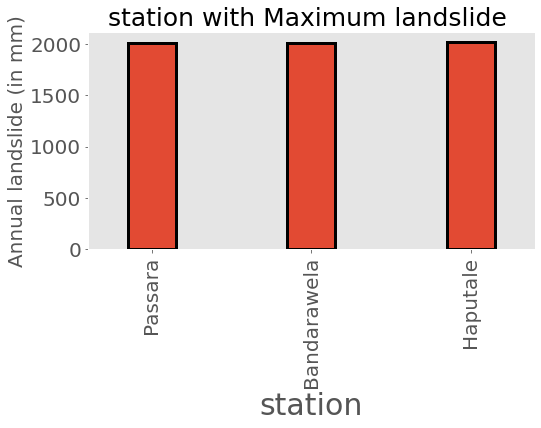

In [89]:
ax=landslide.groupby(['DSD'])['year'].max().sort_values().tail(10).plot.bar(width=0.3,edgecolor='k',align='center',linewidth=3,figsize=(8,4))

plt.xlabel('station',fontsize=30)
plt.ylabel('Annual landslide (in mm)',fontsize=20)
plt.title('station with Maximum landslide ',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()


In [90]:

landslide.groupby('DSD')['Date of Occurrence'].count()


DSD
Bandarawela    88
Haputale       20
Passara         1
Name: Date of Occurrence, dtype: int64

In [91]:
landslide.groupby('GND')['Date of Occurrence'].count()

GND
43/20,st.thomas rd      1
Ambadandegama(GN)       2
Ambegoda (GN)           1
Ambegoda(GN)            1
Ambewela,Bandarawela    1
                       ..
kebillawela(GN)         2
mathetilla(GN)          1
st.thomas rd            1
udaperuwa(GN)           1
withanawewa(GN)         1
Name: Date of Occurrence, Length: 82, dtype: int64

In [112]:
landslide.describe()

,A,year
count,109.000000,109.000000
mean,105.513761,2005.779817
std,80.604270,5.041233
min,7.000000,1984.000000
25%,52.000000,2006.000000
50%,79.000000,2006.000000
75%,106.000000,2007.000000
max,331.000000,2017.000000


In [113]:
landslide.head()

,A,Province,District,DSD,GND,Date of Occurrence,year,month
0,7,Uva,Badulla,Bandarawela,NaN,2014-10-30,2014,Oct
1,25,Uva,Badulla,Bandarawela,Gediyaroda(GN),2008-01-09,2008,Jan
2,26,Uva,Badulla,Bandarawela,"Wiyala Wagura,Heel Oya,Bandarawela",2006-10-27,2006,Oct
3,27,Uva,Badulla,Bandarawela,NaN,2006-10-20,2006,Oct
4,28,Uva,Badulla,Bandarawela,Diganathenna(GN),2006-11-09,2006,Nov


#  Time Series Analysis
 

## applying sarima model 


In [92]:
#rainfall is seasonally distributed sarima model is apply to check seasonal variation
rainfall


,id,station_name,yyyy,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,annual,monthly average,MA10
0,01BD0034,BANDARA ELIYA ESTATE,1999.0,226.100002,200.899998,266.199999,221.900002,114.900000,44.500001,76.100000,13.800000,179.400003,230.299997,289.900000,132.100002,166.341667,153.143548,NaN
1,01BD0034,BANDARA ELIYA ESTATE,2000.0,266.199999,391.700002,295.800000,202.800001,101.399999,80.799999,7.800000,144.000000,135.300000,71.000000,322.800000,155.800000,181.283333,115.646667,NaN
2,01BD0034,BANDARA ELIYA ESTATE,2001.0,191.599996,71.200000,13.600000,539.200005,57.200000,32.800000,88.999998,6.500000,83.800000,366.700001,167.800000,186.400002,150.483333,189.472131,NaN
3,01BD0034,BANDARA ELIYA ESTATE,2002.0,92.700000,85.700000,276.700002,545.400003,195.200003,62.600000,4.000000,72.299999,86.300001,612.799997,342.999997,227.600000,217.025000,326.995161,NaN
4,01BD0034,BANDARA ELIYA ESTATE,2003.0,233.699998,59.300001,412.599995,299.299999,239.000001,20.200000,63.700000,11.000000,218.199999,188.299999,384.400000,53.100000,181.899999,181.393443,NaN
5,01BD0034,BANDARA ELIYA ESTATE,2004.0,110.499998,68.699999,87.300001,300.099999,96.500002,17.300000,26.000000,12.600000,330.900002,468.699995,313.000002,313.199999,178.733333,66.423729,NaN
6,01BD0034,BANDARA ELIYA ESTATE,2005.0,182.400000,90.600000,216.200001,440.000001,164.000000,24.500000,30.800000,66.400000,95.900002,231.200000,672.199998,135.500000,195.808333,63.400000,NaN
7,01BD0034,BANDARA ELIYA ESTATE,2006.0,216.599999,79.300000,181.599998,213.399998,160.999998,23.800000,13.500000,61.999999,154.599998,604.099995,716.399997,325.600002,229.324999,67.633333,NaN
8,01BD0034,BANDARA ELIYA ESTATE,2007.0,149.300000,27.700000,130.000000,488.499999,17.700000,54.900000,33.200000,52.700000,127.000000,306.600004,178.900000,257.500000,152.000000,165.481967,NaN
9,01BD0034,BANDARA ELIYA ESTATE,2008.0,112.899999,229.099999,416.700002,491.500000,18.000000,10.000000,60.500000,236.400000,40.299999,517.000000,328.200000,208.500000,222.425000,400.172131,NaN


In [93]:
#rainfall['station_name'].unique()

In [94]:
#rainfall.groupby('station_name')['annual'].count()

In [95]:
#rainfall.groupby('station_name')['monthly average'].count()

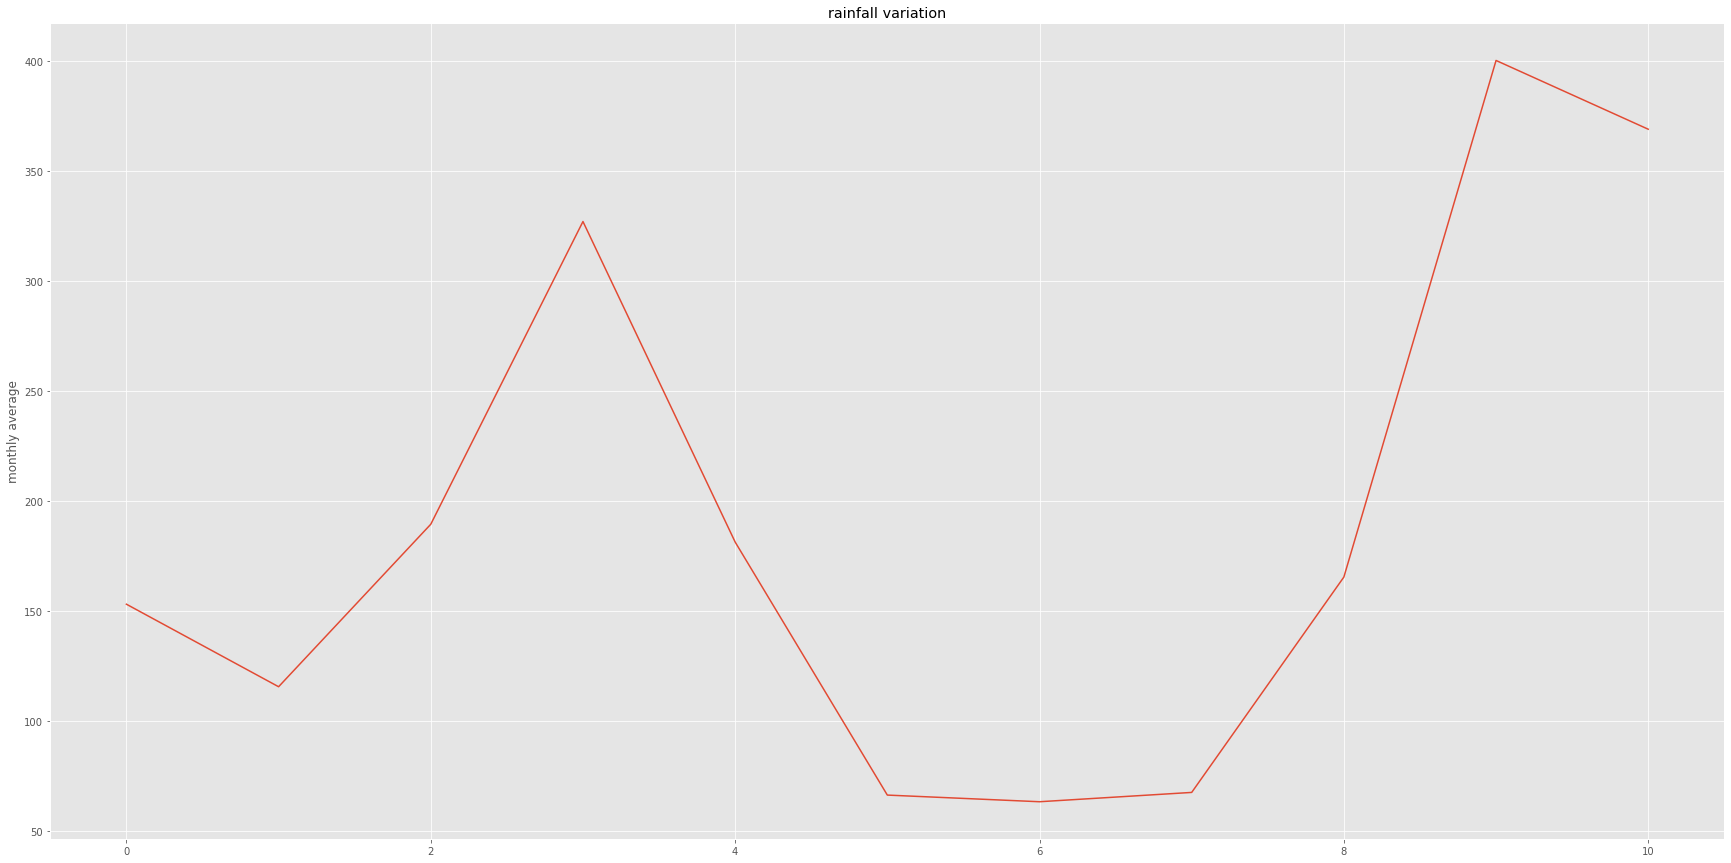

In [96]:
plt.figure(figsize=(30,15))
sns.lineplot(x=rainfall.index, y=rainfall['monthly average'])
plt.title('rainfall variation')
plt.show()


In [97]:
y=rainfall['monthly average']


<AxesSubplot:>

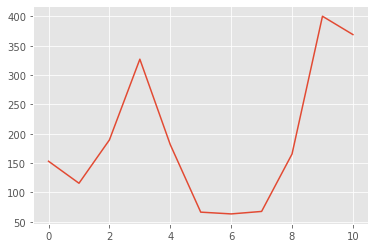

In [98]:
y.plot()

In [99]:
y_train=y[:len(y)-11]
y_test=y[(len(y)-11):]


In [100]:
y_train[-2:]

47   NaN
48   NaN
Name: monthly average, dtype: float64

In [101]:
y_test[-2:]

59   NaN
61   NaN
Name: monthly average, dtype: float64

<AxesSubplot:>

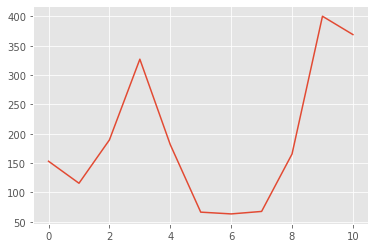

In [102]:
y_train.plot()

<AxesSubplot:>

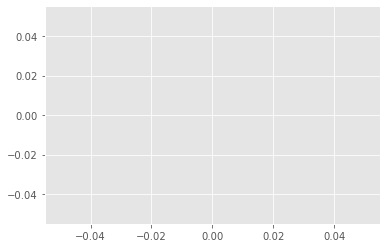

In [103]:

y_test.plot()

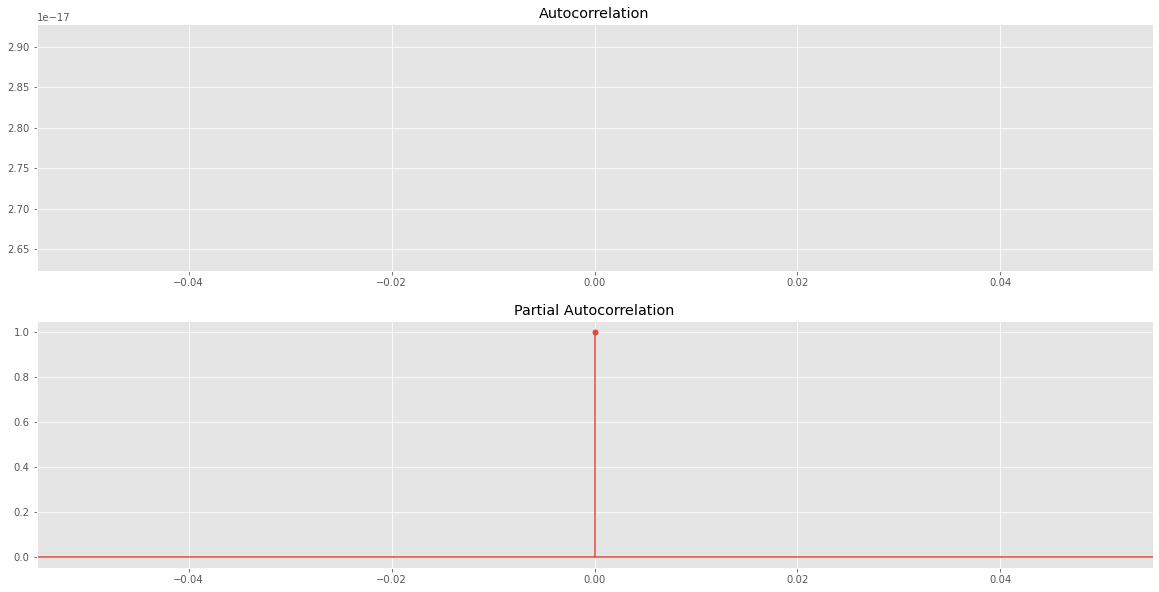

In [104]:
fig,ax=plt.subplots(2,figsize=(20,10))
ax[0]=plot_acf(y_train ,ax=ax[0],lags=10)
ax[1]=plot_pacf(y_train ,ax=ax[1],lags=10)


In [105]:

#ts_decomp=sm.tsa.seasonal_decompose(y_train,model='additive')
#ts_decomp.plot()
#plt.show


In [106]:

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [107]:
metric_aic_dict=dict()
for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y_train,
                                            order=pm,
                                            seasonal_order=pm_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            
            model_aic = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(pm, pm_seasonal, model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:139.0789809323602
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:119.79966834118915
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:113.34991113910047
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0

In [108]:

{k: v for k, v in sorted(metric_aic_dict.items(),key=lambda x:x[1])}

{((0, 0, 0), (0, 1, 0, 12)): 2.0,
 ((0, 1, 0), (0, 1, 0, 12)): 2.0,
 ((0, 0, 0), (0, 0, 1, 12)): 4.0,
 ((0, 0, 0), (0, 1, 1, 12)): 4.0,
 ((0, 0, 0), (1, 0, 0, 12)): 4.0,
 ((0, 0, 0), (1, 1, 0, 12)): 4.0,
 ((0, 0, 1), (0, 1, 0, 12)): 4.0,
 ((0, 1, 0), (0, 0, 1, 12)): 4.0,
 ((0, 1, 0), (0, 1, 1, 12)): 4.0,
 ((0, 1, 0), (1, 0, 0, 12)): 4.0,
 ((0, 1, 0), (1, 1, 0, 12)): 4.0,
 ((0, 1, 1), (0, 1, 0, 12)): 4.0,
 ((1, 0, 0), (0, 1, 0, 12)): 4.0,
 ((1, 1, 0), (0, 1, 0, 12)): 4.0,
 ((0, 0, 0), (1, 0, 1, 12)): 6.0,
 ((0, 0, 0), (1, 1, 1, 12)): 6.0,
 ((0, 0, 1), (0, 0, 1, 12)): 6.0,
 ((0, 0, 1), (0, 1, 1, 12)): 6.0,
 ((0, 0, 1), (1, 0, 0, 12)): 6.0,
 ((0, 0, 1), (1, 1, 0, 12)): 6.0,
 ((0, 1, 0), (1, 0, 1, 12)): 6.0,
 ((0, 1, 0), (1, 1, 1, 12)): 6.0,
 ((0, 1, 1), (0, 0, 1, 12)): 6.0,
 ((0, 1, 1), (0, 1, 1, 12)): 6.0,
 ((0, 1, 1), (1, 0, 0, 12)): 6.0,
 ((0, 1, 1), (1, 1, 0, 12)): 6.0,
 ((1, 0, 0), (0, 0, 1, 12)): 6.0,
 ((1, 0, 0), (0, 1, 1, 12)): 6.0,
 ((1, 0, 0), (1, 0, 0, 12)): 6.0,
 ((1, 0, 0), (


## fitting the final model as per the lowest aic

In [109]:
model = sm.tsa.statespace.SARIMAX(y_train,
                                  order=(0,0,0),
                                  seasonal_order=(0,0,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

model_aic=model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.21e+04   3.07e+04      1.698      0.089   -8025.412    1.12e+05


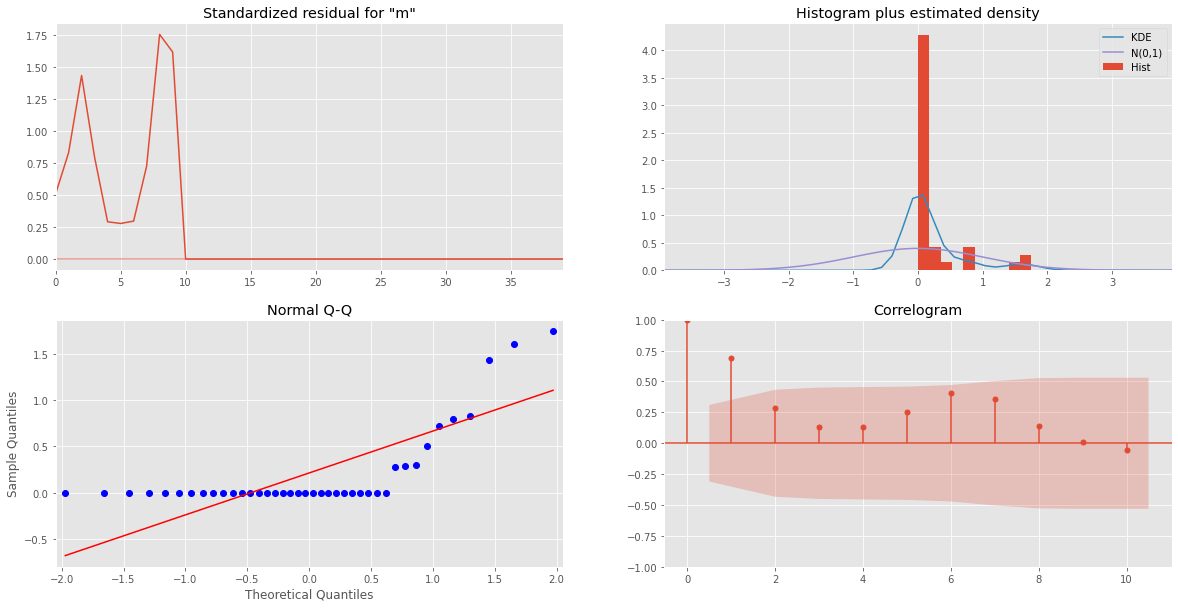

In [110]:

model_aic.plot_diagnostics(figsize=(20,10))
plt.show()


# #calculating the rmse
# forecast=model_aic.get_prediction(start=pd.to_datetime('2000'),dynamic=False)
# predictions=forecast.predicted_mean
# 
# actual=y_test['2000':]
# rmse=np.sqrt((predictions - actual)**2).mean()
# print('the root mean squareroot of forecast is {} '.format(round(rmse,2)))
# 

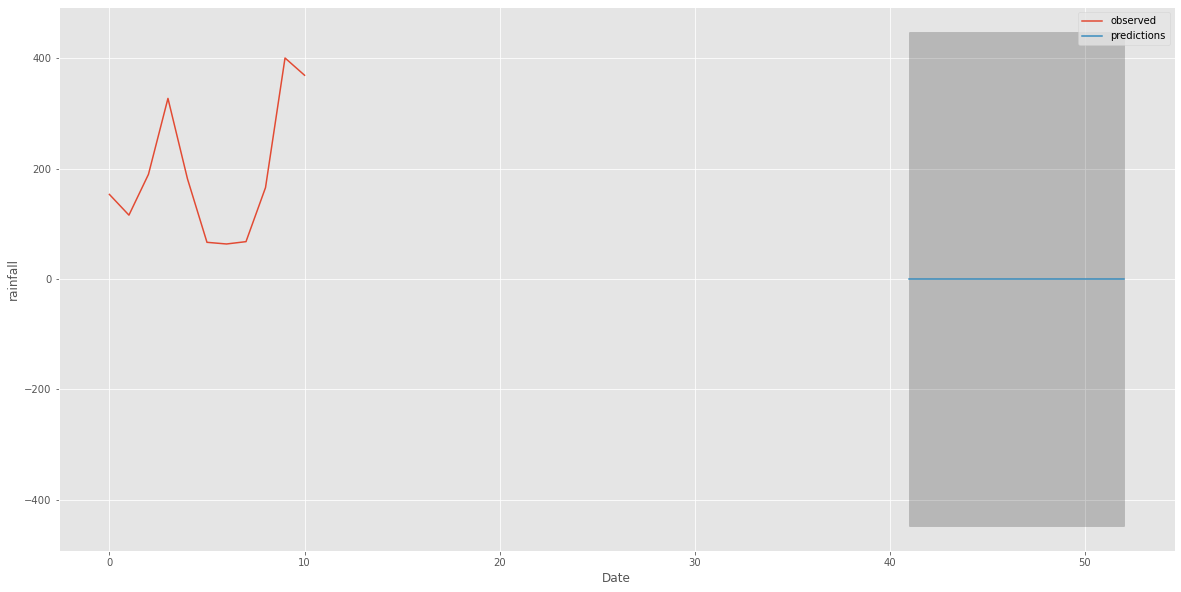

In [111]:
forecast=model_aic.get_forecast(steps=12)

predictions=forecast.predicted_mean
ci=forecast.conf_int()

#observed plot

fig=y.plot(label='observed',figsize=(14,7))
fig.set_xlabel('Date')
fig.set_ylabel('rainfall')
fig.fill_between(ci.index,
                ci.iloc[:,0],
                ci.iloc[:,1],color='k',alpha=.2)

#prediction
predictions.plot(ax=fig,label='predictions',alpha=7,figsize=(20,10))

plt.legend()
plt.show()